In [1]:
import pandas as pd
from pathlib import Path

data_dir = Path("timings")

dfs = [pd.read_csv(f) for f in data_dir.glob("*.csv")]

In [2]:
df = pd.concat(dfs)

df.loc[df.library == "dask", "library"] = "Dask"
df.loc[df.library == "ray", "library"] = "Ray"
df.loc[df.library == "sklearn", "library"] = "Scikit-learn"

df = df.drop(columns="Unnamed: 0")

In [3]:
df

,library,best_score,best_params,fit_time,start_time,n_params,n_jobs,max_epochs,n_models,partial_fit_calls
0,Dask,0.998987,{'value': 0.9989870227689996},214.778564,1.595460e+09,100,8,100,98.0,1252.0
1,Ray,NaN,NaN,186.134140,1.595460e+09,100,8,100,NaN,NaN
2,Scikit-learn,0.986887,{'value': 0.9868869366005173},1252.909173,1.595460e+09,100,8,100,NaN,NaN


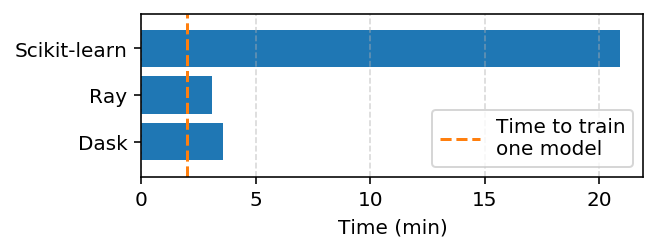

In [4]:
import matplotlib.pyplot as plt
w = 1.5
fig, ax = plt.subplots(figsize=(3 * w, w))

minutes = df.fit_time / 60
ax.barh(df.library, minutes, color="C0", align='center')
ax.set_xlabel("Time (min)")
# ax.set_ylabel("Library")

len_X = 60e3
max_iter = 100
latency = 1 * len_X / 50e3
train_t = max_iter * latency / 60
eps = 0.25
ax.plot([train_t, train_t], [-1 + eps, 3 - eps], "C1--", label="Time to train\none model")
ax.set_ylim(-1 + eps, 3 - eps)
ax.grid(alpha=0.5, linestyle="--", axis="x")
ax.legend(loc="best")
fig.savefig("n_workers=8.png", dpi=300, bbox_inches="tight")

In [5]:
minutes / train_t

0     1.789821
1     1.551118
2    10.440910
Name: fit_time, dtype: float64

In [6]:
minutes

0     3.579643
1     3.102236
2    20.881820
Name: fit_time, dtype: float64